### Importing Libraries

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Choosing the initial Parameters

In [257]:
# Flight Params
rho     = 1.225
g       = 9.81
b       = 2
AR      = 9.686999647
S       = b**2 / AR
payload_mass_drop = 1
payload_mass = 2.1

V_climb = 20
V_cruise = 22
V_des = 20

cruise_dist_1 = 40000
cruise_dist_2 = 40000

height_cruise = 200

gamma_climb = 8
gamma_des = 8

C_d_0 = 0.03
e = 0.8

energy_density = 237600

Initial_weight = 8.5
# g = 9.8

In [258]:
def Power_climb(V_cl,gamma_climb,Weight):
    C_l = Weight*np.cos(np.deg2rad(gamma_climb))/(0.5*rho*V_cl**2*S)
    C_d = C_d_0 + C_l**2/(np.pi*AR*e)
    D_cl = 0.5*rho*V_cl**2*S*C_d
    T_cl = D_cl + Weight*np.sin(np.deg2rad(gamma_climb))
    P_cl = T_cl*V_cl
    return P_cl

def Power_cruise(V_cr,Weight):
    P_cr = Power_climb(V_cr,0,Weight)
    return P_cr

def Power_descent(V_des,gamma_des,Weight):
    P_des = max(Power_climb(V_des,-gamma_des,Weight),0)
    return P_des

def Power_loiter(V_loi,Weight):
    P_loi = Power_cruise(V_loi,Weight)
    return P_loi

In [259]:
t_cr_1 = cruise_dist_1/V_cruise
t_cr_2 = cruise_dist_2/V_cruise

t_cl_1 = height_cruise/(V_climb*np.sin(np.deg2rad(gamma_climb)))
t_des_1 = height_cruise/(V_des*np.sin(np.deg2rad(gamma_des)))

t_cr_1,t_cr_2,t_cl_1,t_des_1

(1818.1818181818182,
 1818.1818181818182,
 np.float64(71.85296534327719),
 np.float64(71.85296534327719))

In [260]:
def Total_energy(Weight):
    energy_climb = Power_climb(V_climb,gamma_climb,Weight)*t_cl_1
    energy_cruise_1 = Power_cruise(V_cruise,Weight)*t_cr_1
    energy_cruise_2 = Power_cruise(V_cruise,Weight-payload_mass_drop*g)*t_cr_2
    energy_descent = Power_descent(V_des,gamma_des,Weight-payload_mass_drop*g)*t_des_1
    Total_energy = energy_climb + energy_cruise_1 + energy_cruise_2 + energy_descent
    return Total_energy

In [261]:
Total_energy(10*g)/energy_density

np.float64(2.3445491617986245)

### Empty Weight Graph

In [262]:
Data = pd.read_excel("Drone_dataset.xlsx")
Data

,Name,Range (km),Endurance (hr),Cruise Speed (m/s),MTOW (kg),Payload Weight (kg),Empty Weight (kg),Battery Weight (kg),Wing Span (m),Wing Area (m^2),Fuselage Length (m),Aspect Ratio
0,Yangda Mapird Pro,114.444,1.87,17.0,7.5,1.14,4.00,2.36,2.10,0.50,1.20,8.820000
1,Yangda Mapird Plus,-,2.23,20.0,11.5,1.50,5.00,4.72,2.43,0.65,1.40,9.084462
2,Yangda Nim- bus Pro,120.24,1.67,20.0,8.6,2.00,4.03,2.56,1.95,0.46,1.30,8.266304
3,Yangda FW- 250,180,2.00,25.0,12.0,2.00,5.50,4.50,2.50,0.52,1.40,12.019231
4,Avy Aera,67.896,0.92,20.5,12.0,1.50,6.90,3.60,2.40,0.96,1.30,6.000000
5,Foxtech Baby Shark 260,198,2.50,22.0,13.0,2.10,5.60,5.30,2.50,0.50,1.44,12.500000
6,P330 Pro,201.852,2.67,21.0,14.0,2.00,6.30,5.70,2.53,0.56,1.21,11.430179
7,Foxtech AYK-250,374.4,4.00,26.0,15.0,2.20,7.40,5.40,2.50,0.50,1.26,12.500000
8,Wingcopter 178,100,1.50,42.0,18.0,2.00,8.40,7.60,1.78,0.58,1.32,5.462759
9,FlyDragon FLY-2100,200,2.30,18.0,7.0,1.20,3.40,2.40,2.10,0.52,1.20,8.480769


In [263]:
Data = Data[Data["Empty Weight (kg)"]/Data["MTOW (kg)"] <= 0.55]

In [264]:
Mtow_array = Data["MTOW (kg)"].to_numpy()
Empty_weight_array = Data["Empty Weight (kg)"].to_numpy()

Empty_weight_ratios = Empty_weight_array/Mtow_array

In [265]:
logx = np.log10(Mtow_array)
logy = np.log10(Empty_weight_ratios)

In [266]:
A = np.column_stack((logx,np.ones_like(logx)))
B = logy

Soln, residual, _, _ = np.linalg.lstsq(A, B, rcond=None)

L = Soln[0]
loga = Soln[1]
a = 10**loga

print("L =", L)
print("loga =", loga)
print("a =", a)

L = -0.07534699303142871
loga = -0.2515122597552972
a = 0.5603865979148953


In [267]:
residual

array([0.00549305])

In [268]:
a*12**L

np.float64(0.4647021463836613)

In [269]:
W_0 = Initial_weight
Weight_array = []

for i in range(100):
    Weight_array.append(W_0)
    W_b = Total_energy(W_0*g)/energy_density
    W_0 = (payload_mass/(1 - (W_b/W_0) - a*W_0**L)).item()


In [270]:
Weight_array

[8.5,
 7.419792222361141,
 7.8204433126544295,
 7.645111154429303,
 7.717302898502889,
 7.686773437170527,
 7.6995430162819485,
 7.694176978531153,
 7.696427515829889,
 7.695482859871515,
 7.695879240345888,
 7.695712893976841,
 7.695782699241556,
 7.69575340555471,
 7.695765698480879,
 7.695760539802529,
 7.695762704617652,
 7.695761796162448,
 7.695762177391578,
 7.695762017410471,
 7.695762084545825,
 7.695762056372776,
 7.695762068195467,
 7.695762063234126,
 7.695762065316134,
 7.695762064442429,
 7.695762064809076,
 7.695762064655211,
 7.695762064719781,
 7.695762064692684,
 7.695762064704053,
 7.695762064699286,
 7.695762064701284,
 7.69576206470045,
 7.695762064700797,
 7.695762064700651,
 7.695762064700714,
 7.695762064700688,
 7.695762064700697,
 7.695762064700692,
 7.695762064700697,
 7.695762064700692,
 7.695762064700697,
 7.695762064700692,
 7.695762064700697,
 7.695762064700692,
 7.695762064700697,
 7.695762064700692,
 7.695762064700697,
 7.695762064700692,
 7.69576206470

Saved figure to: figures/weight_convergence_original_simple.png


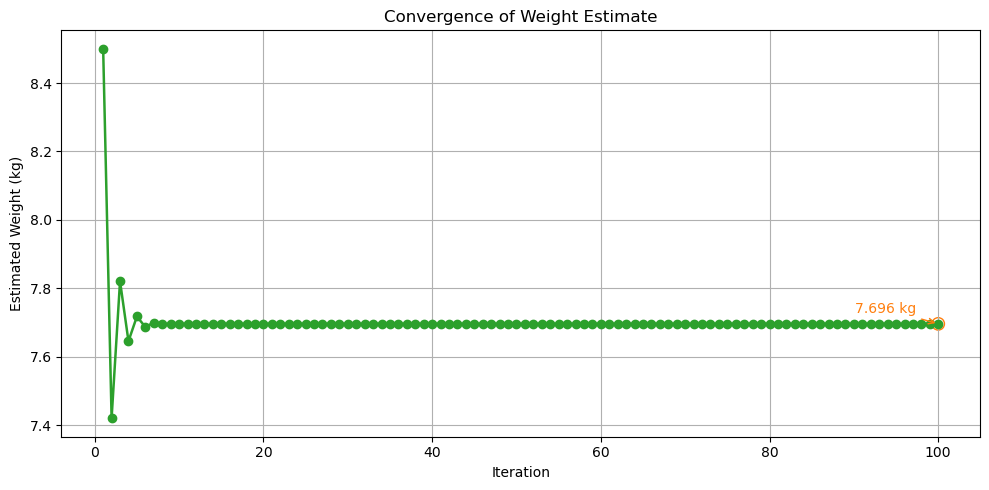

In [271]:
# Simple pyplot convergence plot (original values only)
import os

plt.figure(figsize=(10, 5))

iters = list(range(1, len(Weight_array) + 1))
plt.plot(iters, Weight_array, 'o-', color='tab:green', linewidth=1.8, markersize=6)

# Highlight final value
final_w = Weight_array[-1] if len(Weight_array) > 0 else None
if final_w is not None:
    plt.scatter([iters[-1]], [final_w], s=80, facecolors='none', edgecolors='tab:orange')
    plt.annotate(f'{final_w:.3f} kg', xy=(iters[-1], final_w), xytext=(-60, 8), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='tab:orange'), fontsize=10, color='tab:orange')

plt.xlabel('Iteration')
plt.ylabel('Estimated Weight (kg)')
plt.title('Convergence of Weight Estimate')
plt.grid(True)
plt.tight_layout()

# Save (simple)
os.makedirs('figures', exist_ok=True)
out_path = os.path.join('figures', 'weight_convergence_original_simple.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved figure to: {out_path}")

plt.show()

In [272]:
final_weight = Weight_array[-1]

In [273]:
plot_weight = np.linspace(3,20,1000)
plot_empt_rat = a*plot_weight**L

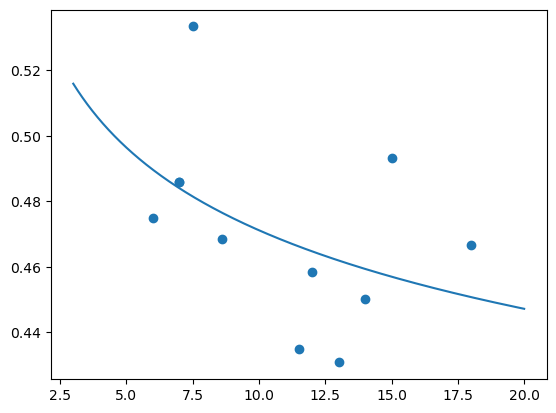

In [274]:
plt.scatter(Mtow_array,Empty_weight_ratios)
plt.plot(plot_weight,plot_empt_rat)

In [275]:
print(Power_climb(V_climb,gamma_climb,final_weight*g),Power_cruise(V_cruise,final_weight*g),Power_cruise(V_cruise,(final_weight-payload_mass_drop)*g),Power_descent(V_des,gamma_des,(final_weight-payload_mass_drop)*g))

316.2234082447377 122.86546796704204 112.64157768804893 0


In [276]:
Battery_weight = Total_energy(final_weight*g)/energy_density
print(Battery_weight)

1.897795530543535


In [277]:
np.ones_like(logx)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [278]:
Empty_weights = np.array([1,1.1,1.5,1.6,1.7,1.8,1.7])
Total_weights = np.array([2,3,4,4.5,5,4.5,8])
Empty_weight_ratio = Empty_weights/Total_weights

In [279]:
Empty_weight_ratio

array([0.5       , 0.36666667, 0.375     , 0.35555556, 0.34      ,
       0.4       , 0.2125    ])

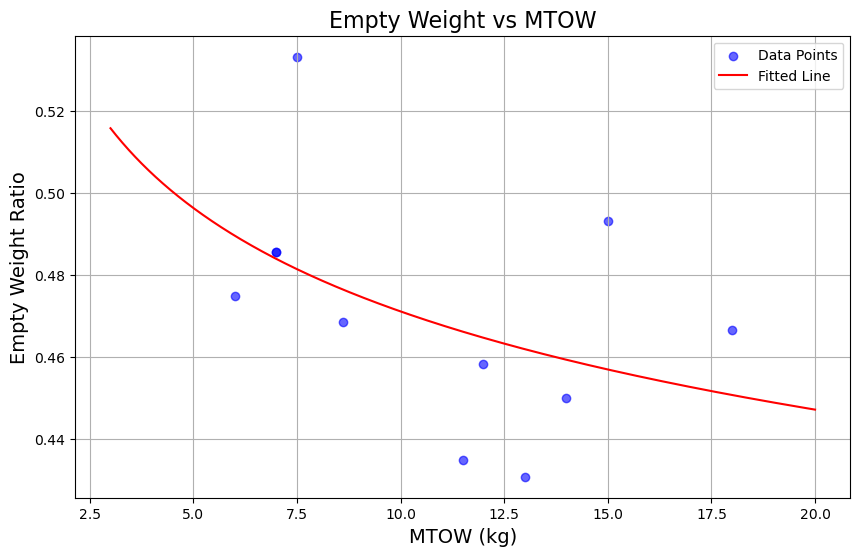

In [280]:
# Beautifying the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.title('Empty Weight vs MTOW', fontsize=16)  # Set the title
plt.xlabel('MTOW (kg)', fontsize=14)  # Set x-axis label
plt.ylabel('Empty Weight Ratio', fontsize=14)  # Set y-axis label
plt.grid(True)  # Enable grid
plt.scatter(Mtow_array, Empty_weight_ratios, color='blue', label='Data Points', alpha=0.6)  # Scatter plot
plt.plot(plot_weight, plot_empt_rat, color='red', label='Fitted Line')  # Fitted line
plt.legend()  # Show legend
plt.show()  # Display the plot

